%matplotlib inline: Pour l'affichage des graphique sur jupyter

In [1]:
%matplotlib inline  
import numpy as np


In [2]:
#Import Pytorch
import torch
import torch.nn as nn 
import torch.optim as optim


In [3]:
# Parameters(figure size) : specify the size of my figures
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
#Fixer la graine (seed)
torch.manual_seed(1)

**Linear regression** 

Simple regression is a linear problem between continuous variables $x$ and $y$.Here, we write the model $y=2+0.5x$ and generate $y$ using an additional Gaussian standard random noise.


Text(0, 0.5, 'y')

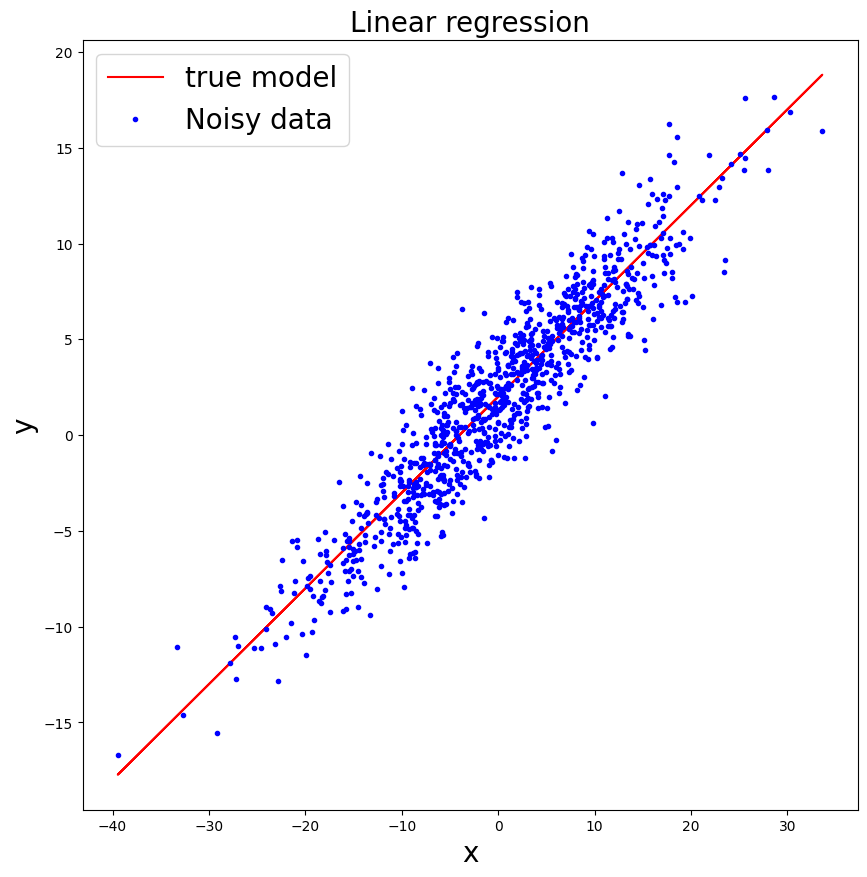

In [5]:
#Generate data 
x = torch.randn(1000,1) * 10 #Input variable (1000 lignes et 1 colonne)
# x est sous forme d'un tenseur 
y_true = 2 + 0.5*x #True model
y = y_true + torch.randn(1000,1) * 2 # Add noise to the truth

#Plot noise and data true model
plot(x, y_true, 'r')
plot(x, y, 'b.')
legend(['true model', 'Noisy data'], prop={'size':20})
title('Linear regression', size=20)
xlabel('x', size = 20)
ylabel('y', size = 20)

The objective is to build a neural network to fit the relationship between $x$ and $y$. In Pytorch, it is necessary to create a specific class for each neural network architecture. Below, we declare the neural network corresponding to a linear regression.

In [6]:
#Declare a class for linear regression
class linear_regression_nn(nn.Module):

    #class initialization
    def __init__(self, input_size, output_size):
        super(linear_regression_nn, self).__init__()
        #fully connected layer with linear activation
        self.fc = nn.Linear(input_size, output_size)

    # function to apply the neural network 
    def forward(self, x):
        y_pred = self.fc(x)
        return y_pred
    

Then, we create a neural network based on the specific architecture declared above. We finally check the values of the parameters (randomly generated).

In [7]:
#Create the neural network (1 input size for x and 1 output size for y, bias is declared by default)
linear_regression_model = linear_regression_nn(1,1)

#Print the model architecture
print(linear_regression_model)

#Print the model parameters (weights of the neural network)
slope, bias = linear_regression_model.parameters()
print("Slope: ", slope)
print("Bias: ", bias)


linear_regression_nn(
  (fc): Linear(in_features=1, out_features=1, bias=True)
)
Slope:  Parameter containing:
tensor([[0.0292]], requires_grad=True)
Bias:  Parameter containing:
tensor([-0.5334], requires_grad=True)


In order to quantify the quality of the fit given by my neural network, we define a loss function. For a regression problem, the classic loss function is the MSE.
Then, to compute the gradient of the loss function w.r.t the parameters of the neural network, we use an optimization technique. A classic one is the Stochastic Gradient Descent.

In [8]:
#Loss function
criterion = nn.MSELoss()
#Optimizer: new_parameters = old_parameters - lr * gradient, with lr the learning rate
optimizer = torch.optim.SGD(linear_regression_model.parameters(), lr=0.001)


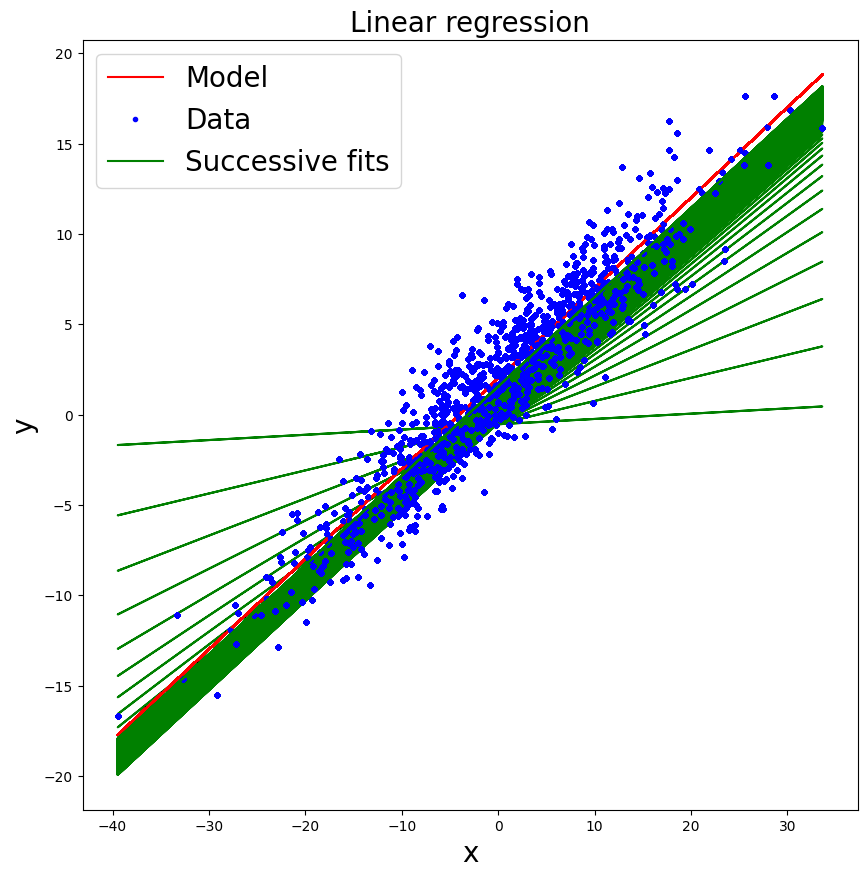

In [9]:
epochs = 1000 # number of epochs
losses = [] #List to stock the loss at each iteration

for i in range(epochs):

    #compute the prediction using the current parameters of the neural network
    y_pred = linear_regression_model.forward(x)

    #Compute loss and stock it
    loss = criterion(y_pred, y)
    losses.append(loss.detach().numpy())

    #initialize the gradient to zero
    optimizer.zero_grad()

    #compute the gradient by back propagation
    loss.backward()

    #update the parameter values using the gradient
    optimizer.step()

    #plot  at each epoch
    plot(x, y_true, "r")
    plot(x, y, "b.")
    plot(x, y_pred.detach().numpy(), "g")
    legend(["Model", "Data", "Successive fits"], prop={"size": 20})
    title("Linear regression", size=20)
    xlabel("x", size=20)
    ylabel("y", size=20)

Text(0, 0.5, 'Loss value')

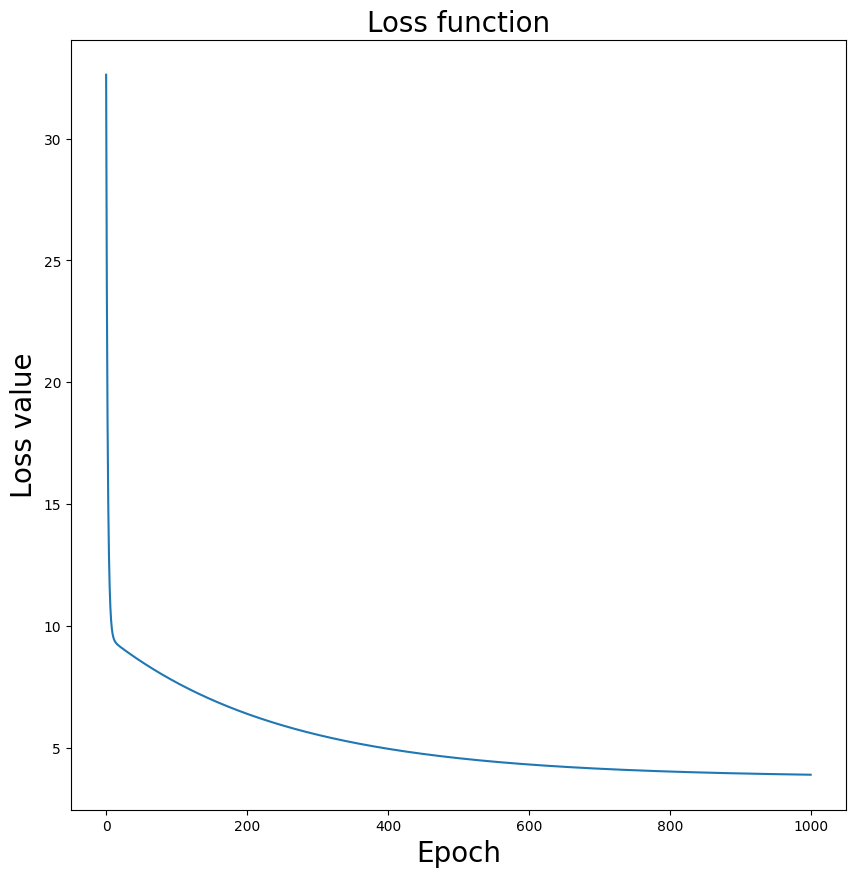

In [10]:
# Print the loss function
plot(range(epochs), losses)
title('Loss function', size=20)
xlabel('Epoch', size=20)
ylabel('Loss value', size=20)

In [11]:
# Extract and print the model parameters (weights of the neural network)
slope, bias = linear_regression_model.parameters()
print('Slope: ', slope)
print('Bias: ', bias)

Slope:  Parameter containing:
tensor([[0.4941]], requires_grad=True)
Bias:  Parameter containing:
tensor([1.5506], requires_grad=True)


**Nonlinear regression**
Now, we perform a multiple regression between continuous variabkes $x$ ans $y$. Here, we write the non linear model $y=2+0.5x-0.05x^2$ and generate y using an additional Gaussian standard random noise.

Text(0, 0.5, 'y')

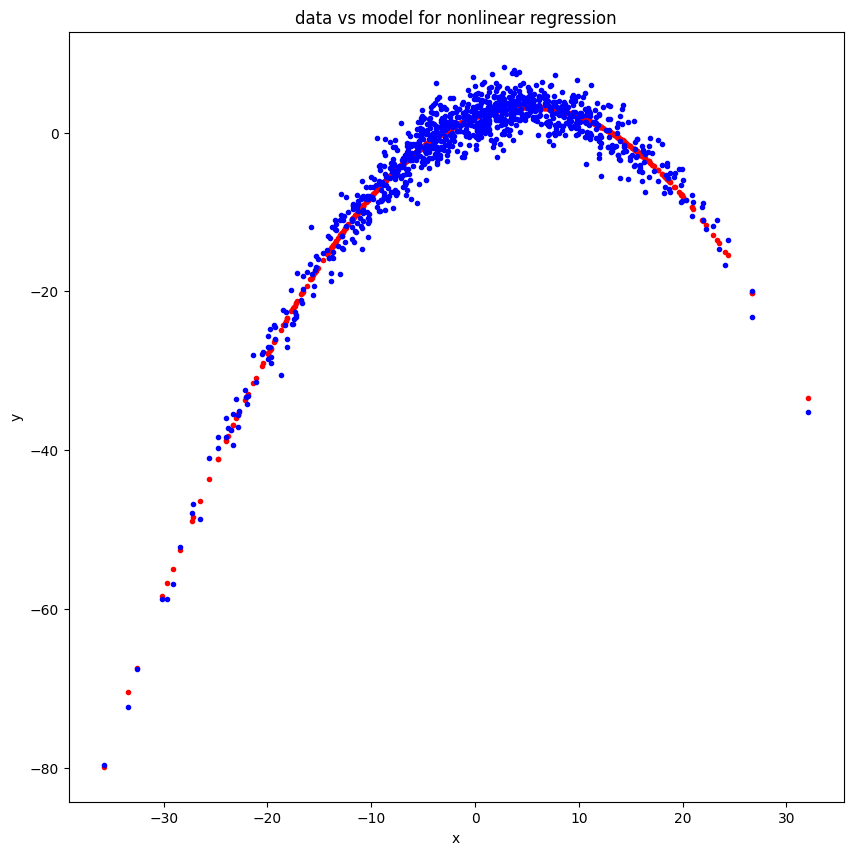

In [12]:
#generate data
x = torch.randn(1000,1)*10
y_true = 2 + 0.5*x - 0.05*x**2
y = y_true + torch.randn(1000, 1)*2

plot(x,y_true,"r.")
plot(x,y, "b.")
title("data vs model for nonlinear regression")
xlabel("x")
ylabel("y")

In [13]:
# Declare a class for nonlinear regression
class nonlinear_regression_nn(nn.Module):
    
    # class initialization
    def __init__(self, input_size, hidden_size, output_size):
        super(nonlinear_regression_nn, self).__init__()
        # fully connected layer with linear activation
        self.fc0 = nn.Linear(input_size, hidden_size)
        # ReLu activation
        self.relu = nn.ReLU()
        # fully connected layer with linear activation
        self.fc1 = nn.Linear(hidden_size, output_size)
        
    # function to apply the neural network
    def forward(self, x):
        out = self.fc0(x)
        out = self.relu(out)
        y_pred = self.fc1(out)
        return y_pred
    
# Create the neural network (1 input size for x, 6 neurons in the hidden layer, and 1 output size for y)
nonlinear_regression_model = nonlinear_regression_nn(1, 6, 1)

In [14]:
# Print the model parameters (weights of the neural network)
for name, param in nonlinear_regression_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fc0.weight tensor([[-0.7187],
        [-0.3857],
        [-0.2343],
        [-0.5503],
        [-0.1648],
        [ 0.6943]])
fc0.bias tensor([ 0.5165, -0.6734,  0.6508,  0.2039,  0.1187,  0.0865])
fc1.weight tensor([[-0.2019, -0.3385,  0.0936,  0.3533, -0.3352,  0.3632]])
fc1.bias tensor([0.2127])


In [15]:
# Loss function: MSE = sum [(y - y_pred)^2]
criterion = nn.MSELoss()

# Optimizer: new_parameters = old_parameters - lr*gradient, with lr the learning rate
optimizer = torch.optim.SGD(nonlinear_regression_model.parameters(), lr = 0.001)

In [16]:
epochs = 20000 # number of epochs
losses = [] # list to stock the loss at each iteration

# Loop on epochs
for i in range(epochs):
    
    # compute the prediction using the previous parameters of the neural network
    y_pred = nonlinear_regression_model.forward(x)
    
    # compute and stock the loss
    loss = criterion(y_pred, y)
    losses.append(loss.detach().numpy())
    
    # initialize the gradient to zero
    optimizer.zero_grad()
    
    # compute the gradient by back propagation
    loss.backward()
    
    # update the parameter values using the gradient
    optimizer.step()

Text(0, 0.5, 'Loss value')

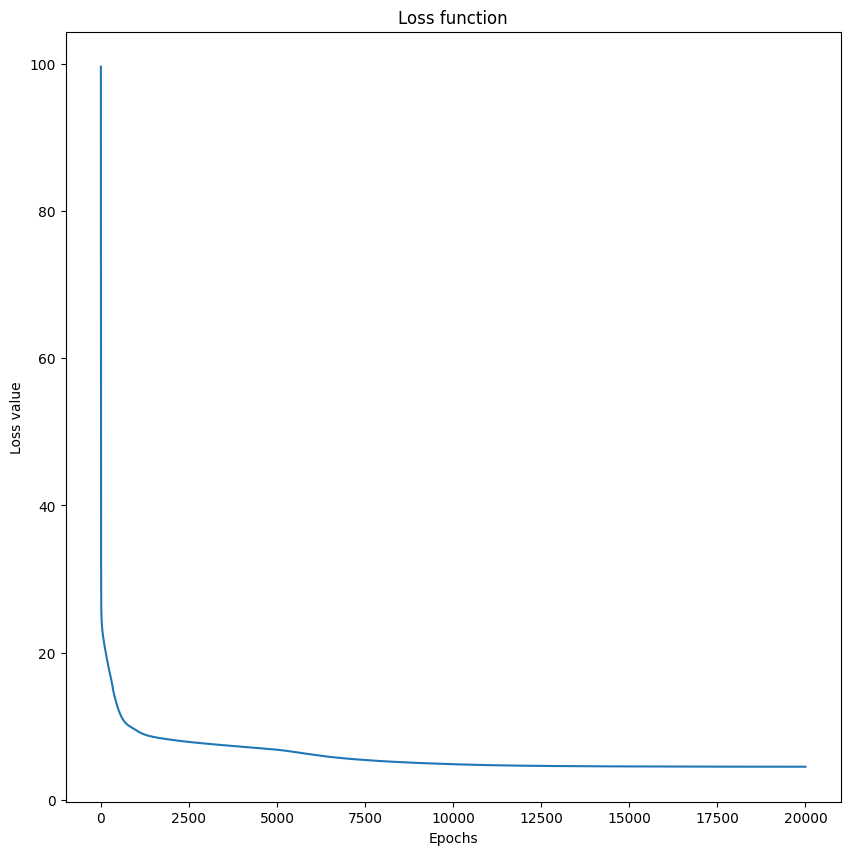

In [17]:
#Print the loss function
plot(range(epochs), losses)
title("Loss function")
xlabel("Epochs")
ylabel("Loss value")


Text(0, 0.5, 'y')

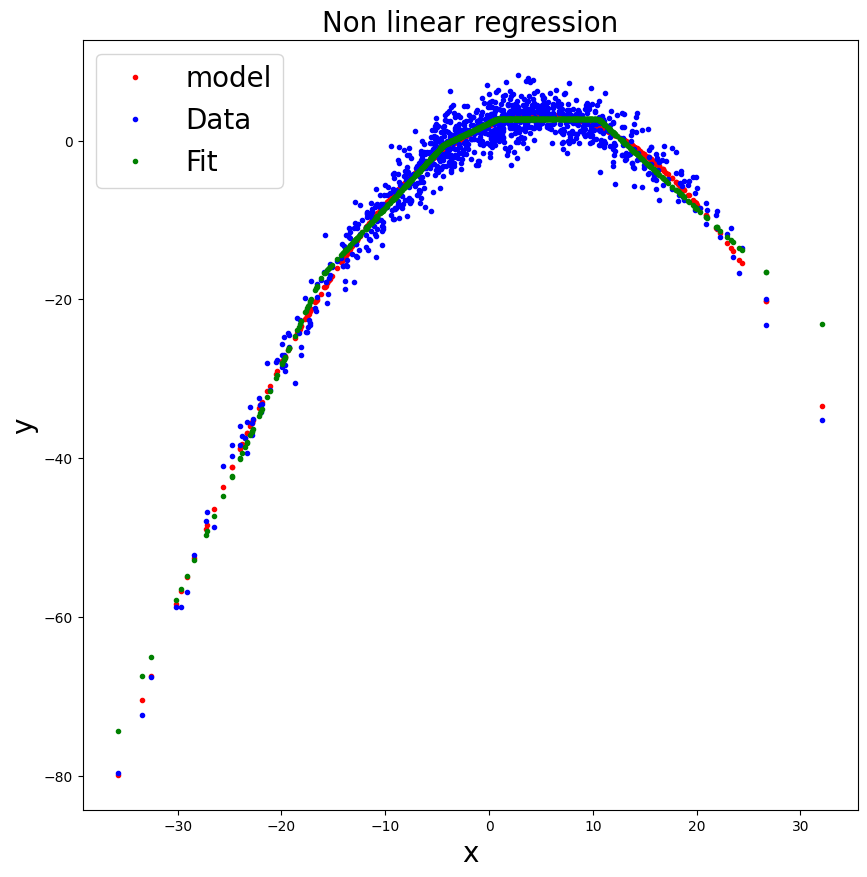

In [18]:
plot(x, y_true, 'r.')
plot(x, y, 'b.')
plot(x, y_pred.detach().numpy(), 'g.')
legend(['model', 'Data', 'Fit'], prop={'size':20})
title('Non linear regression', size=20)
xlabel('x', size=20)
ylabel('y', size=20)


**Logistic regression(Binary classification)** 

In a classification problem, $y$ is a discrete variable with various classes. Here, $y$ is binary and takes its values between 0 and 1. We write model as $y = f\left(2+0.5x\right)$ with $f$ the logistic transfer function (sigmoid).
As previously, we generate $y$ adding Gaussian perturbations.


Text(0, 0.5, 'y')

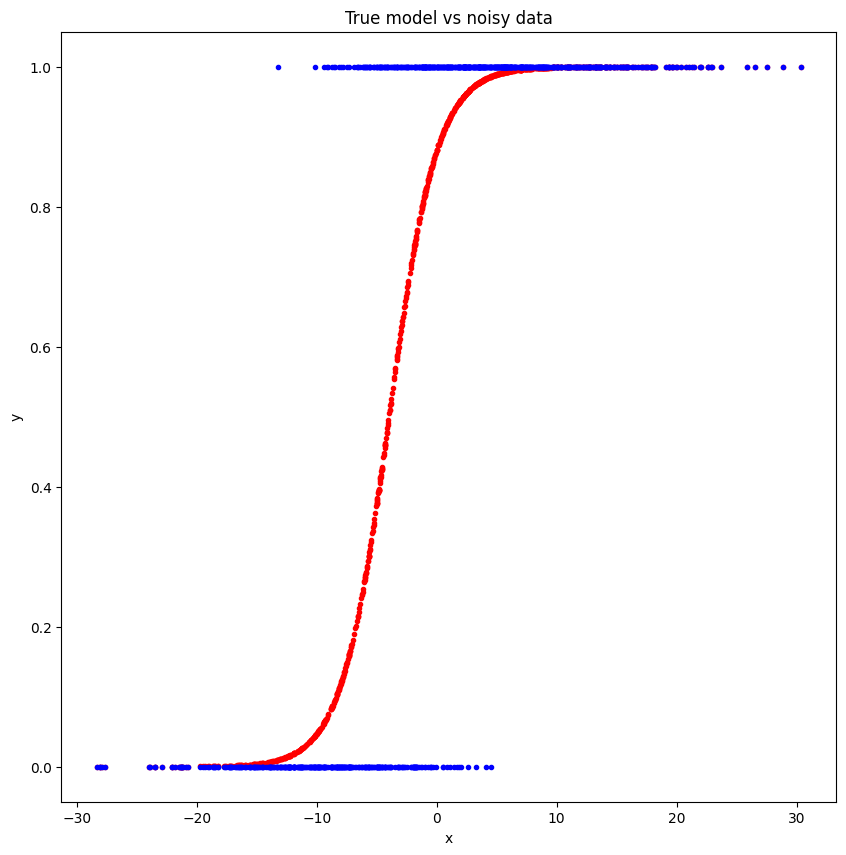

In [19]:
#Generate data
x = torch.randn(1000,1)*10 #Input variable
y_true = 1 / (1 + exp(-(2 + 0.5 * x))) #True variable
y_noisy = 1 / (1 + exp(-(2 + 0.5 * x)+ torch.randn(1000,1)*2)) #Noisy data
y = (y_noisy>0.5).float() #Transform to binary data 
#print(y)
#Plot noisy data and true model
plot(x, y_true, 'r.')
plot(x, y, 'b.')
title("True model vs noisy data")
xlabel("x")
ylabel("y")
       

In [20]:
#Define our model
class binary_classification(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(binary_classification, self).__init__()
        self.fc0 = nn.Linear(input_size, hidden_size) #equivalent to Dense(input_size, hidden_size) julia
        self.fc1 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        out = self.fc0(x)
        out = self.fc1(out)
        y_pred = torch.sigmoid(out)
        return y_pred
        
    

In [21]:
model = binary_classification(1, 6, 1)
model.named_parameters

<bound method Module.named_parameters of binary_classification(
  (fc0): Linear(in_features=1, out_features=6, bias=True)
  (fc1): Linear(in_features=6, out_features=1, bias=True)
)>

In [22]:
#Loss function
criterion = nn.BCELoss() #Binary Cross Entropy: L(y, y') = - [y * log(y') + (1 - y) * log(1 - y')]

In [23]:
#L'optimisation
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [24]:
losses = []
epochs = 1000
for i in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y_noisy)
    losses.append(loss.detach().numpy())

    #Initilialize the gradient to zero
    optimizer.zero_grad()

    #Back propagation
    loss.backward()

    #update the parameter values using the gradient
    optimizer.step()
    if i%10 == 0:
        print(loss)

with torch.no_grad():
    y_pred = model(x)
    y_pred_classes = (y_pred > 0.5).float()
accuracy = torch.mean((y_pred_classes == y).float())
print(accuracy)

tensor(4.0475, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3949, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3665, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3597, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3556, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3523, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3493, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3465, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3440, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3417, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3395, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3375, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3357, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3339, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3323, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3309, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3295, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3282, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3271, grad_fn=<Bina

Text(0, 0.5, 'Loss function')

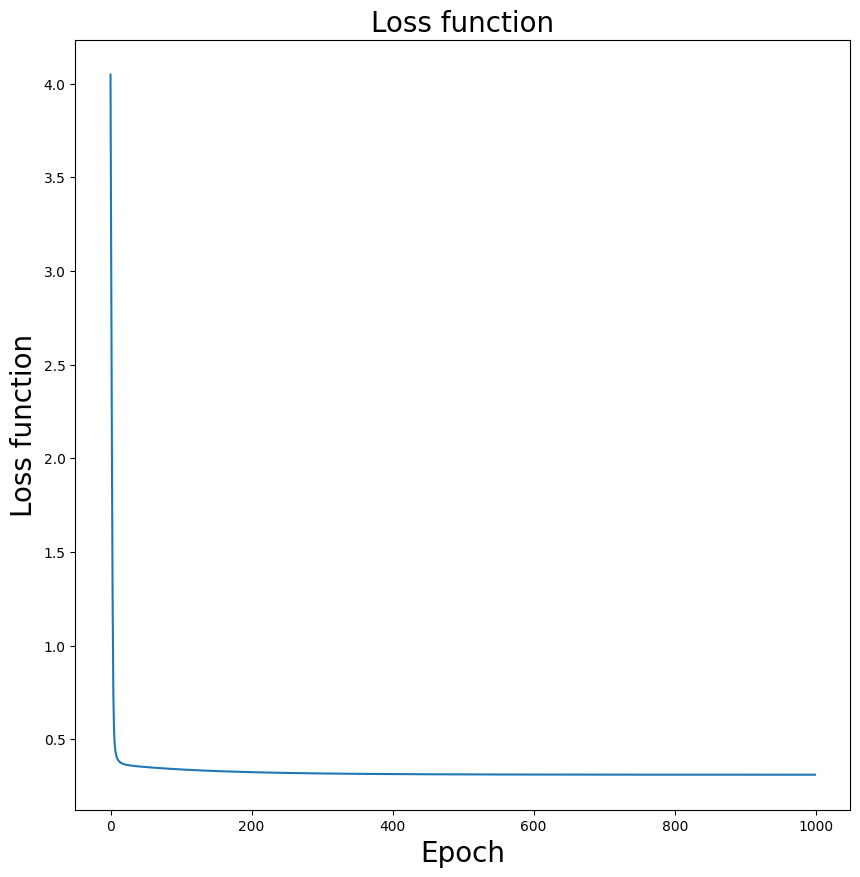

In [25]:
#loss function
plot(range(epochs), losses)
title('Loss function', size = 20)
xlabel('Epoch', size=20)
ylabel('Loss function', size=20)

Below,we define a sigmoid function, well known in neural networks, especially for classification problems. The analytic derivative of the sigmoid function is also defined.

In [26]:
#Define the sigmoid function
def f(x):
    return torch.sigmoid(x)
def f_prime(x):
    return torch.exp(-x)/ (1 + torch.exp(-x))**2

In [27]:

#Generate data
x = torch.linspace(-5.0, 5.0, 100, requires_grad=True) #We  want to calculate the derivatives with respect to x
f_x = f(x)
f_prime_x = f_prime(x)

#Apply the automatic differentiation
a = f(x)
y = torch.sum(f(x))
print(y)
y.backward(retain_graph=True) 
print(y.grad_fn)
x.grad #To print gradients



tensor(50., grad_fn=<SumBackward0>)


tensor([0.0066, 0.0073, 0.0081, 0.0090, 0.0099, 0.0109, 0.0121, 0.0133, 0.0147,
        0.0162, 0.0178, 0.0197, 0.0217, 0.0238, 0.0262, 0.0289, 0.0317, 0.0349,
        0.0383, 0.0420, 0.0460, 0.0504, 0.0551, 0.0602, 0.0657, 0.0716, 0.0779,
        0.0847, 0.0918, 0.0994, 0.1074, 0.1158, 0.1246, 0.1336, 0.1430, 0.1525,
        0.1622, 0.1719, 0.1816, 0.1910, 0.2003, 0.2090, 0.2173, 0.2249, 0.2317,
        0.2375, 0.2423, 0.2461, 0.2486, 0.2498, 0.2498, 0.2486, 0.2461, 0.2423,
        0.2375, 0.2317, 0.2249, 0.2173, 0.2090, 0.2003, 0.1910, 0.1816, 0.1719,
        0.1622, 0.1525, 0.1430, 0.1336, 0.1246, 0.1158, 0.1074, 0.0994, 0.0918,
        0.0847, 0.0779, 0.0716, 0.0657, 0.0602, 0.0551, 0.0504, 0.0460, 0.0420,
        0.0383, 0.0349, 0.0317, 0.0289, 0.0262, 0.0238, 0.0217, 0.0197, 0.0178,
        0.0162, 0.0147, 0.0133, 0.0121, 0.0109, 0.0099, 0.0090, 0.0081, 0.0073,
        0.0066])

Text(0.5, 0, 'x')

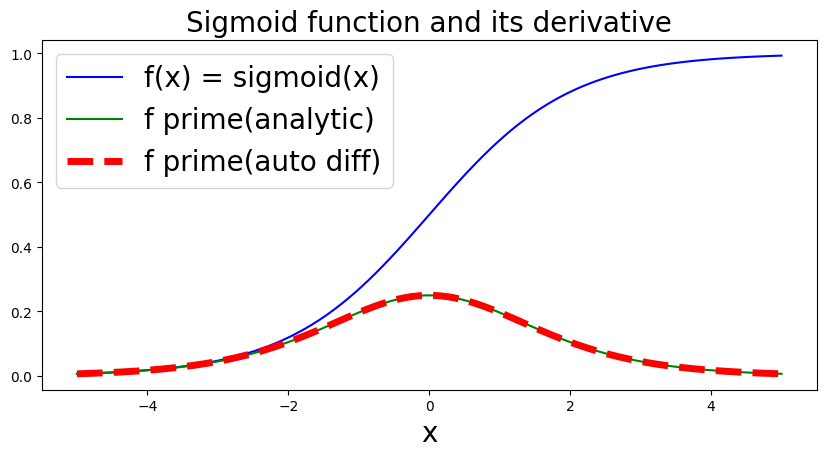

In [28]:
#Plot results
subplot(2, 1, 1)
plot(x.detach().numpy(), f_x.detach().numpy(),'b')
plot(x.detach().numpy(), f_prime_x.detach().numpy(), 'g')
plot(x.detach().numpy(), x.grad.detach().numpy(), 'r--', linewidth=5)
legend(['f(x) = sigmoid(x)', 'f prime(analytic)', 'f prime(auto diff)'], prop={'size': 20})
title('Sigmoid function and its derivative', size=20)
xlabel('x', size=20)

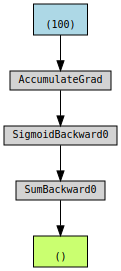

In [29]:
from torchviz import make_dot
#Computational graph
make_dot(y)

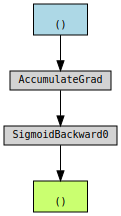

In [30]:
a = torch.tensor(10.0, requires_grad=True)
b = f(a)
make_dot(b)

In [31]:
print(a.is_leaf) #
print(b.is_leaf)

True
False


In [32]:
#Loop to calculate gradients (without using sum)
gradients = []
for i in range(len(x)):
    point = torch.tensor(x[i].item(), requires_grad = True) #item() extract scalar value for my tensor
    a = f(point)
    a.backward(retain_graph=True)
    gradients.append(point.grad.item())
print(gradients)
print(len(gradients))

[0.006648056674748659, 0.007344212848693132, 0.008112047798931599, 0.008958677761256695, 0.009891855530440807, 0.010920035652816296, 0.012052392587065697, 0.013298902660608292, 0.014670338481664658, 0.01617836393415928, 0.017835509032011032, 0.01965523324906826, 0.02165192738175392, 0.02384091354906559, 0.02623842842876911, 0.028861574828624725, 0.03172826021909714, 0.034857090562582016, 0.038267217576503754, 0.041978154331445694, 0.04600949212908745, 0.05038062855601311, 0.05511033162474632, 0.06021625176072121, 0.06571440398693085, 0.07161840796470642, 0.07793880999088287, 0.08468213677406311, 0.09184998273849487, 0.09943792223930359, 0.10743442177772522, 0.11581972241401672, 0.12456466257572174, 0.133629709482193, 0.14296402037143707, 0.15250472724437714, 0.16217662394046783, 0.17189210653305054, 0.18155167996883392, 0.19104506075382233, 0.20025275647640228, 0.20904836058616638, 0.21730151772499084, 0.2248813956975937, 0.23166044056415558, 0.23751875758171082, 0.24234817922115326, 0

[-5.         -4.8989897  -4.79798    -4.6969695  -4.5959597  -4.4949493
 -4.3939395  -4.292929   -4.1919193  -4.090909   -3.989899   -3.8888888
 -3.7878788  -3.6868687  -3.5858586  -3.4848485  -3.3838384  -3.2828283
 -3.1818182  -3.0808082  -2.979798   -2.878788   -2.777778   -2.6767678
 -2.5757575  -2.4747474  -2.3737373  -2.2727273  -2.1717172  -2.070707
 -1.969697   -1.8686869  -1.7676768  -1.6666667  -1.5656567  -1.4646466
 -1.3636365  -1.2626263  -1.1616162  -1.0606061  -0.95959604 -0.85858595
 -0.75757587 -0.6565657  -0.55555564 -0.45454556 -0.35353544 -0.25252533
 -0.15151525 -0.05050515  0.05050515  0.15151525  0.25252533  0.35353544
  0.45454556  0.55555564  0.6565657   0.75757587  0.85858595  0.95959604
  1.0606061   1.1616162   1.2626263   1.3636365   1.4646466   1.5656567
  1.6666667   1.7676768   1.8686869   1.969697    2.070707    2.1717172
  2.2727273   2.3737373   2.4747474   2.5757575   2.6767678   2.777778
  2.878788    2.979798    3.0808082   3.1818182   3.2828283   

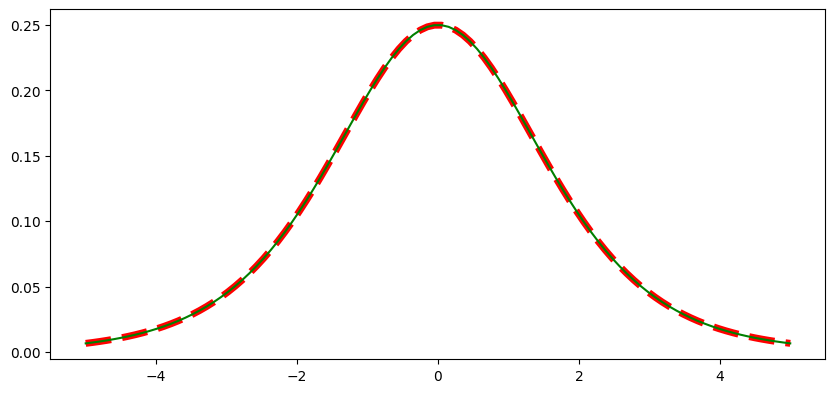

In [33]:
print(x.detach().numpy())
subplot(2, 1, 1)
plot(x.detach().numpy(), gradients, 'r--', linewidth = 5)
plot(x.detach().numpy(), f_prime_x.detach().numpy(), 'g')

**Optimization of a 2D function using automatic differentiation**

Input: $x_1, x_2, x_1^2, x_2^2, x_1 x_2$

Output: 0 or 1.

$f(x_1, x_2, w) = sigmoid{(w_0 + w_1 x_1 + w_2 x_2 + w_{11} x_1^2 + w_{22} x_2^2 + w_{12} x_1 x_2)}$. The binary output $y$ is defined as the following: if $f(x_1, x_2, w)\leq0.5$ then $y=0$, and if $f(x_1, x_2, w)>0.5$ then $y=1$.

Goal: 
The goal here is to: (i) generate $x_1$, $x_2$, and $y$ data, (ii) estimate the $w$ parameters using a classic gradient-descent optimization procedure based on automatic differentiation, (iii) compare the estimated parameters with the true ones.


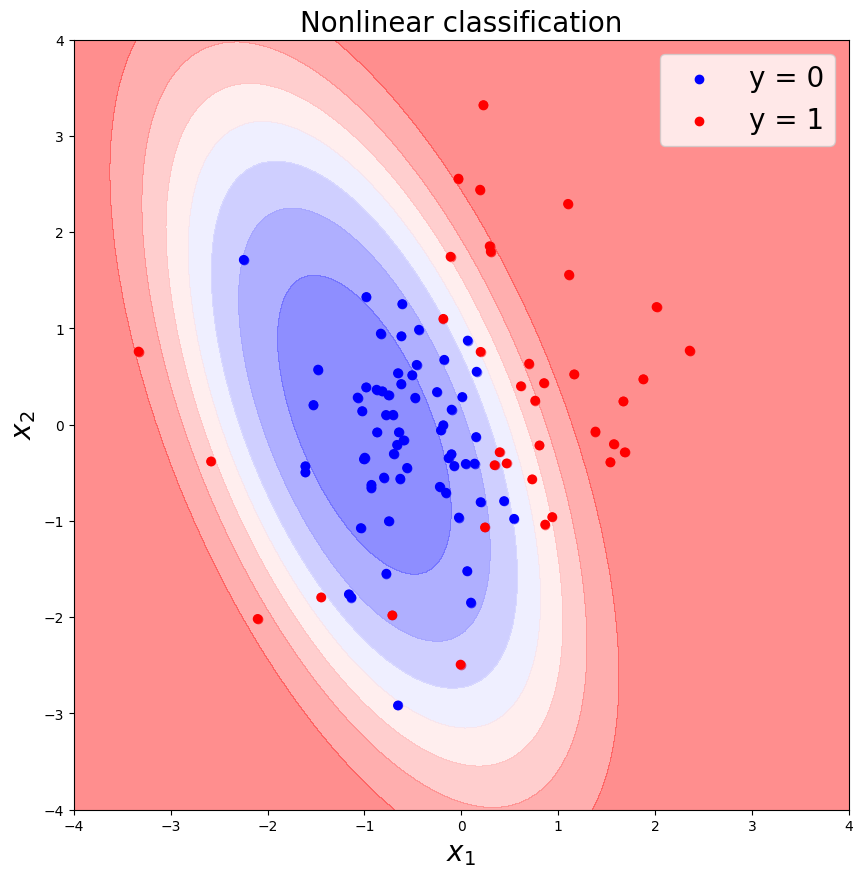

In [75]:
# Fix the seed
torch.manual_seed(1)

# Input variables
x1 = torch.randn(100, 1)
x2 = torch.randn(100, 1)

# True parameters
w0 = -0.5
w1 = 1.5
w2 = 0.5
w11 = 0.75
w22 = 0.25
w12 = 0.5

# Noise
epsilon = torch.randn(100, 1)/3

# Output variable
y_noise = torch.sigmoid(w0 + w1*x1 + w2*x2 + w11*x1**2 + w22*x2**2 + w12*x1*x2 + epsilon)
y = (y_noise>0.5).float() # transform to binary data

# For visualization
X1, X2 = torch.meshgrid(torch.linspace(-4, 4, 100), torch.linspace(-4, 4, 100))
Y = torch.sigmoid(w0 + w1*X1 + w2*X2 + w11*X1**2 + w22*X2**2 + w12*X1*X2)

# Plot data
scatter(x1[y==0], x2[y==0], c='b')
scatter(x1[y==1], x2[y==1], c='r')
contourf(X1.numpy(), X2.numpy(), Y.numpy(), cmap='bwr', alpha=0.5)
scatter(x1, x2, c=y, cmap='bwr')
xlabel("$x_1$", fontsize=20)
ylabel("$x_2$", fontsize=20)
title('Nonlinear classification', size=20)
legend(['y = 0', 'y = 1'], prop={'size': 20})

Loss function BCE:

$\sum_{i=1}^n \left[ - y_i \log(\hat{y}_i) - (1 - y_i) \log(1 - \hat{y}_i) \right]$, with $\hat{y}$ is my model's prediction.

In [89]:
#Define loss function BCE 
#print(x)
def loss_function(x, y_true, w): # x contains x1 and x2
    losses = torch.zeros(x.shape[0]) #Tensor of zeros whose shape = shape of x
    for i, p in enumerate(x): #(index, valeur)
          p = torch.tensor([1,p[0], p[1], p[0]**2, p[1]**2, p[0]*p[1]])
          y_pred = torch.sigmoid(torch.dot(p,w))
          loss = -y_true[i] * torch.log(y_pred) - (1 - y_true[i]) * torch.log(1 - y_pred)
          if not torch.isnan(loss).any():
              losses[i] = loss
    return losses
           

Reference:

https://www.deeplearning.ai/ai-notes/initialization/

In [94]:
from torch.autograd import Variable # Package for autodifferentiation

#Define initial parameter values
w = Variable(torch.cat((torch.zeros(1), torch.randn(5)*sqrt(1/6))), requires_grad = True) #w0 initialized to 0
x = torch.cat((x1,x2) , dim=1)
print(x.shape)

#Compute the loss
losses = loss_function(x, y, w)
loss = torch.sum(losses)
print(loss)

#Backpropagation
loss.backward(retain_graph = True)

with torch.no_grad():
    gradient = w.grad

new_w = w - 10e-4*w.grad



torch.Size([100, 2])
tensor(99.9493, grad_fn=<SumBackward0>)


In [96]:
#Try
my_list = [0.0, 3.0, 9.0, 5.0]
print(my_list)
my_tensor = torch.tensor(my_list)
print(my_tensor)

[0.0, 3.0, 9.0, 5.0]
tensor([0., 3., 9., 5.])


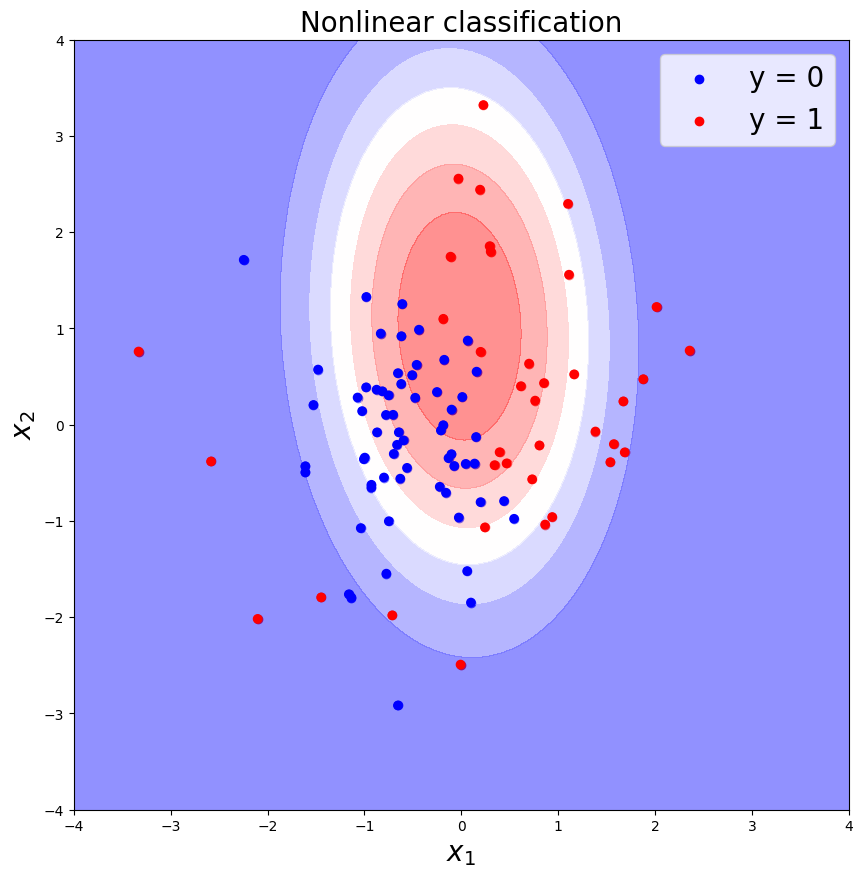

In [99]:
# Fix the seed
torch.manual_seed(1)

# Input variables
x1 = torch.randn(100, 1)
x2 = torch.randn(100, 1)

# True parameters
w0 = -0.5
w1 = 1.5
w2 = 0.5
w11 = 0.75
w22 = 0.25
w12 = 0.5

# Noise
epsilon = torch.randn(100, 1)/3

# Output variable
y_noise = torch.sigmoid(w0 + w1*x1 + w2*x2 + w11*x1**2 + w22*x2**2 + w12*x1*x2 + epsilon)
y = (y_noise>0.5).float() # transform to binary data

# For visualization
X1, X2 = torch.meshgrid(torch.linspace(-4, 4, 100), torch.linspace(-4, 4, 100))
Y = torch.sigmoid(w[0] + w[1]*X1 + w[2]*X2 + w[3]*X1**2 + w[4]*X2**2 + w[5]*X1*X2)
Y = Y.detach().numpy()

# Plot data
scatter(x1[y==0], x2[y==0], c='b')
scatter(x1[y==1], x2[y==1], c='r')
contourf(X1.numpy(), X2.numpy(), Y, cmap='bwr', alpha=0.5)
scatter(x1, x2, c=y, cmap='bwr')
xlabel("$x_1$", fontsize=20)
ylabel("$x_2$", fontsize=20)
title('Nonlinear classification', size=20)
legend(['y = 0', 'y = 1'], prop={'size': 20})

tensor(85.9800, grad_fn=<SumBackward0>)
tensor(35.3478, grad_fn=<SumBackward0>)
tensor(27.9413, grad_fn=<SumBackward0>)
tensor(24.8026, grad_fn=<SumBackward0>)
tensor(23.0068, grad_fn=<SumBackward0>)
tensor(21.8264, grad_fn=<SumBackward0>)
tensor(20.9872, grad_fn=<SumBackward0>)
tensor(20.3594, grad_fn=<SumBackward0>)
tensor(19.8725, grad_fn=<SumBackward0>)
tensor(19.4843, grad_fn=<SumBackward0>)


Text(0, 0.5, 'Loss value')

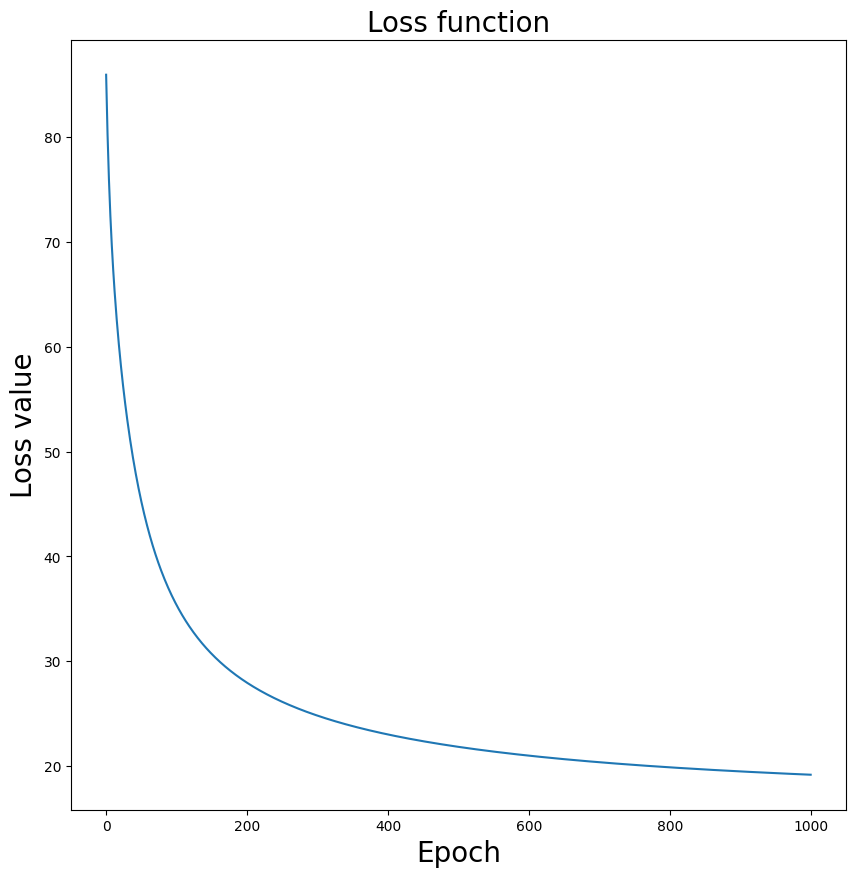

In [104]:
w = Variable(torch.cat((torch.zeros(1), torch.randn(5)*sqrt(1/6))), requires_grad = True)
losses = []
epochs = 1000
for i in range(epochs):
    loss = torch.sum(loss_function(x, y, w))
    loss.backward(retain_graph=True)
    with torch.no_grad():
        w -= 10e-4*w.grad
    w.grad.zero_()
    losses.append(loss.detach().numpy())
    if i%100 == 0:
        print(loss)

#Plot my loss function vs epochs
plot(range(epochs), losses)
title('Loss function', size=20)
xlabel('Epoch', size=20)
ylabel('Loss value', size=20)

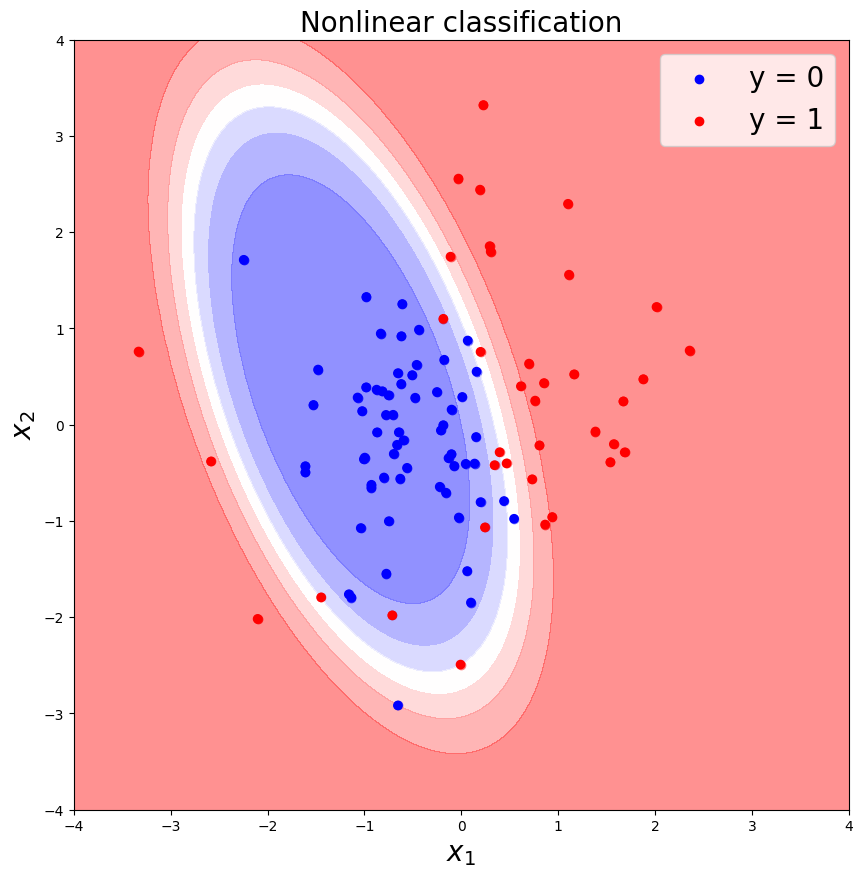

In [103]:
# Fix the seed
torch.manual_seed(1)

# Input variables
x1 = torch.randn(100, 1)
x2 = torch.randn(100, 1)

# True parameters
w0 = -0.5
w1 = 1.5
w2 = 0.5
w11 = 0.75
w22 = 0.25
w12 = 0.5

# Noise
epsilon = torch.randn(100, 1)/3

# Output variable
y_noise = torch.sigmoid(w0 + w1*x1 + w2*x2 + w11*x1**2 + w22*x2**2 + w12*x1*x2 + epsilon)
y = (y_noise>0.5).float() # transform to binary data

# For visualization
X1, X2 = torch.meshgrid(torch.linspace(-4, 4, 100), torch.linspace(-4, 4, 100))
Y = torch.sigmoid(w[0] + w[1]*X1 + w[2]*X2 + w[3]*X1**2 + w[4]*X2**2 + w[5]*X1*X2)
Y = Y.detach().numpy()

# Plot data
scatter(x1[y==0], x2[y==0], c='b')
scatter(x1[y==1], x2[y==1], c='r')
contourf(X1.numpy(), X2.numpy(), Y, cmap='bwr', alpha=0.5)
scatter(x1, x2, c=y, cmap='bwr')
xlabel("$x_1$", fontsize=20)
ylabel("$x_2$", fontsize=20)
title('Nonlinear classification', size=20)
legend(['y = 0', 'y = 1'], prop={'size': 20})

In [106]:
#with 6 hidden layers
class nonlinear_classification(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(nonlinear_classification, self).__init__()
        self.fc0 = nn.Linear(input_size, hidden_size)
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    def forward(self, x):
        out = self.fc0(x)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        y_pred = torch.sigmoid(out)
        return y_pred
model = nonlinear_classification(2, 6, 1)

In [107]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [108]:
losses = []
epochs = 10000
for i in range(epochs):
    y_pred = model(x)
    #y_pred = (y_pred > 0.5).float()
    #y_pred.requires_grad = True
    loss = criterion(y_pred, y)
    losses.append(loss.detach().numpy())
    optimizer.zero_grad()
    
    # compute the gradient by back propagation
    loss.backward()
    
    # update the parameter values using the gradient
    optimizer.step()
    if i%1000 == 0:
        print(loss)
    
with torch.no_grad():
    y_pred = model(x)
    y_pred_classes = (y_pred > 0.5).float()
accuracy = torch.mean((y_pred_classes == y).float())
print(accuracy)

tensor(0.6798, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5529, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3386, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2885, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2393, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1995, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1764, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1642, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1564, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1508, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.9400)


Text(0, 0.5, 'Loss value')

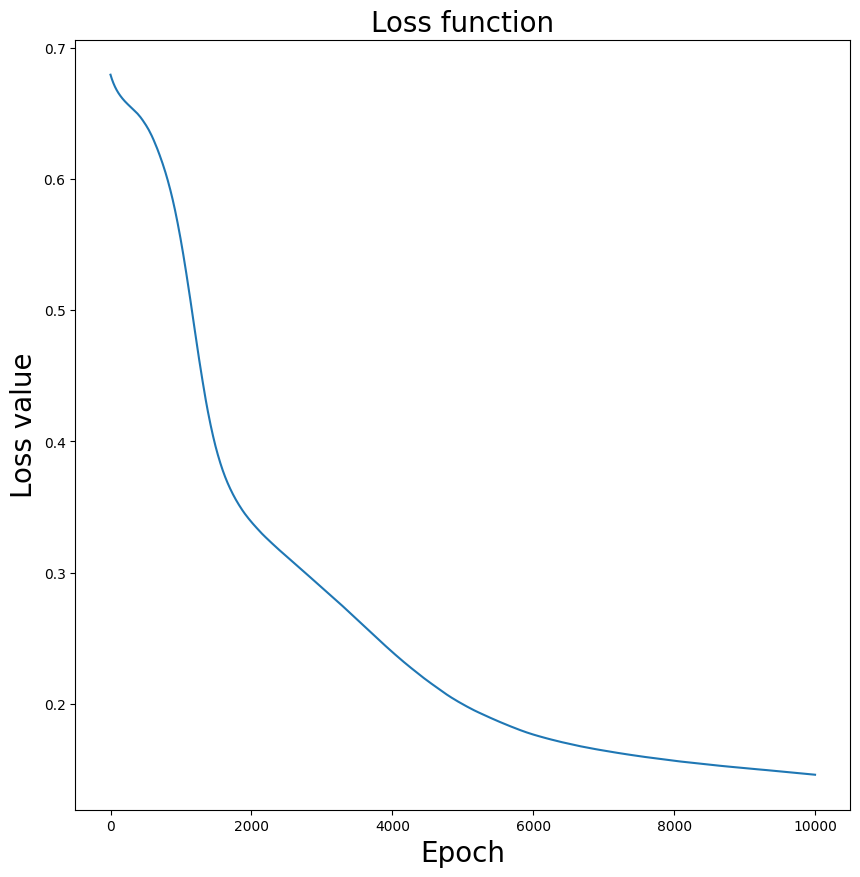

In [109]:
plot(range(epochs), losses)
title('Loss function', size=20)
xlabel('Epoch', size=20)
ylabel('Loss value', size=20)

tensor([[0.0449],
        [0.0032],
        [0.0015],
        [0.1738],
        [0.0080],
        [0.0024],
        [0.0022],
        [0.1921],
        [0.1919],
        [0.9998],
        [0.0052],
        [0.0023],
        [0.0044],
        [1.0000],
        [1.0000],
        [0.7771],
        [0.0088],
        [0.3954],
        [0.9997],
        [0.0881],
        [0.8575],
        [0.2037],
        [0.0066],
        [0.9939],
        [1.0000],
        [0.0326],
        [0.0249],
        [0.6346],
        [0.1813],
        [0.0018],
        [0.0193],
        [0.0030],
        [1.0000],
        [0.0056],
        [0.6782],
        [0.1112],
        [0.9000],
        [0.0121],
        [0.1199],
        [0.0014],
        [0.9473],
        [0.9998],
        [0.0063],
        [0.9997],
        [1.0000],
        [0.1045],
        [1.0000],
        [0.0116],
        [0.0333],
        [0.3224],
        [0.6800],
        [0.0056],
        [0.9990],
        [0.2944],
        [1.0000],
        [1

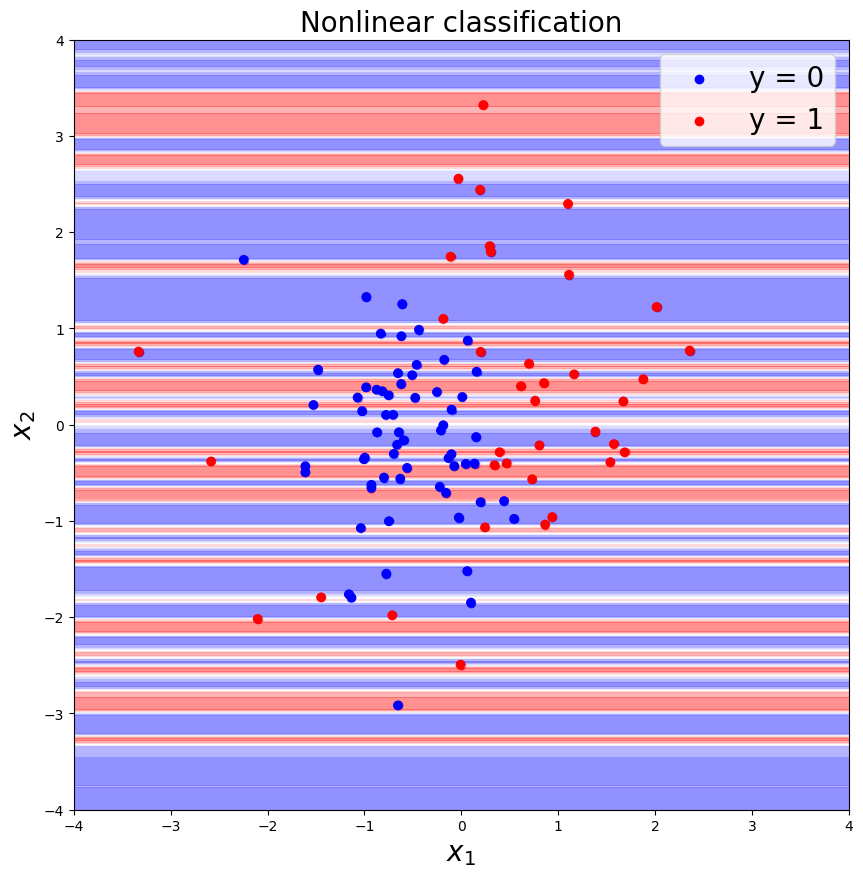

In [111]:
# Fix the seed
torch.manual_seed(1)

# Input variables
x1 = torch.randn(100, 1)
x2 = torch.randn(100, 1)

# True parameters
w0 = -0.5
w1 = 1.5
w2 = 0.5
w11 = 0.75
w22 = 0.25
w12 = 0.5

# Noise
epsilon = torch.randn(100, 1)/3

# Output variable
y_noise = torch.sigmoid(w0 + w1*x1 + w2*x2 + w11*x1**2 + w22*x2**2 + w12*x1*x2 + epsilon)
y = (y_noise>0.5).float() # transform to binary data

# For visualization
X1, X2 = torch.meshgrid(torch.linspace(-4, 4, 100), torch.linspace(-4, 4, 100))
X3 = torch.cat((x1, x2), dim = 1)
predictions = model(X3)
pred = predictions.detach().numpy()
pred = np.tile(np.transpose(pred), (X1.shape[0], 1))
print(predictions)

# Plot data
scatter(x1[y==0], x2[y==0], c='b')
scatter(x1[y==1], x2[y==1], c='r')
contourf(X1.numpy(), X2.numpy(), pred , cmap='bwr', alpha=0.5)
scatter(x1, x2, c=y, cmap='bwr')
xlabel("$x_1$", fontsize=20)
ylabel("$x_2$", fontsize=20)
title('Nonlinear classification', size=20)
legend(['y = 0', 'y = 1'], prop={'size': 20})